## Homework 01: due 2022/03/14 13:10

### - SVM tutorial : https://www.kaggle.com/prashant111/svm-classifier-tutorial

### - After you go through the SVM tutorial, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.



In [2]:
# Import necessary modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [122]:
# Plotting function (you can modify this block change the plot)
def plot_svc_decision_function(model, ax=None, mode='train'):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    if mode == 'train':
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# plot svm results according to different parameters
def plot_svm(X, y, kernel_list=['rbf'], C_list=[1.0], degree_list=[3], gamma_list=['scale']):

    n_plots = len(kernel_list) * len(C_list) * len(degree_list) * len(gamma_list)
    fig, axes = plt.subplots(1, n_plots, figsize=(n_plots * 8, 6))
    i = 0
    for kernel in kernel_list:
        for C in C_list:
            for degree in degree_list:
                for gamma in gamma_list:
                    
                    ax = axes[i]
                    model = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma)
                    model.fit(X, y)
                    ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
                    ax.set_title(f"kernel = {kernel}, C = {C}, degree = {degree}, gamma = {gamma}")
                    plot_svc_decision_function(model, ax)    
                    i += 1

### 1. Kernel function and hyper paramters of support vector machine. (30%)
#### Please make the scatter plots with data, and visualize the decision boundary and positive and negative hyperplanes on the following questions.

##### Here is the example of the figure:
![1.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/1.png?raw=true)

##### 1-1. Please use the __**svc**__ function in scikit learn module to compare the impact of the kernel function on the given two data below. Try at least ***linear, poly & rbf*** kernel functions and set hyper parameters ***C, degree*** and ***gamma*** as default. (15%)

My Ans: 
> The main different among the 3 models is the margin of the hyperplane. The change of the kernel function doesn't significantly impact the predicted results of classification in the first dataset.
> However, RBF kernel performs the best in the second dataset. By means of non-linear kenerl, the better classification results we get compared to the linear one. Hence, we can infer that the distribution of the second dataset seems to be non-linear.

In [123]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=2)

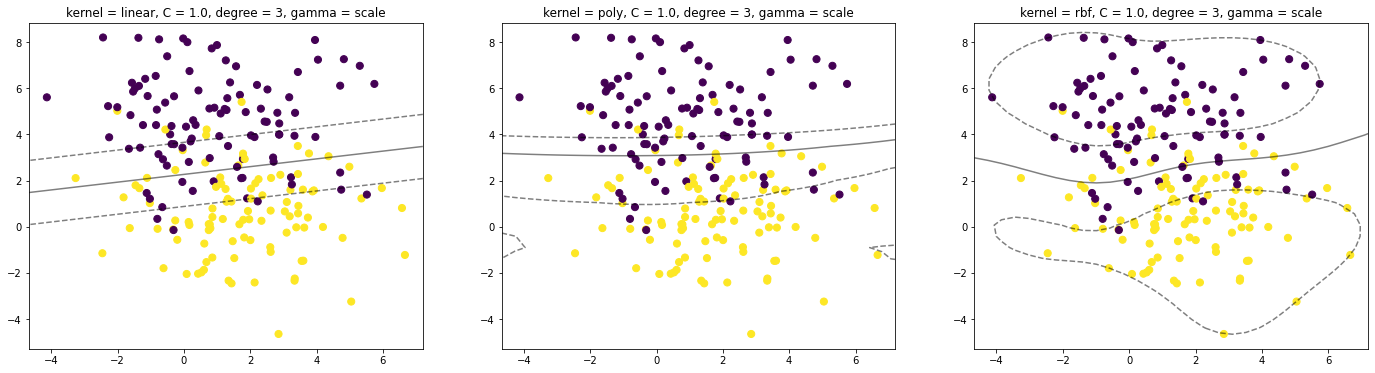

In [124]:
plot_svm(X,
         y,
         kernel_list=['linear', 'poly', 'rbf'])

In [125]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=0)

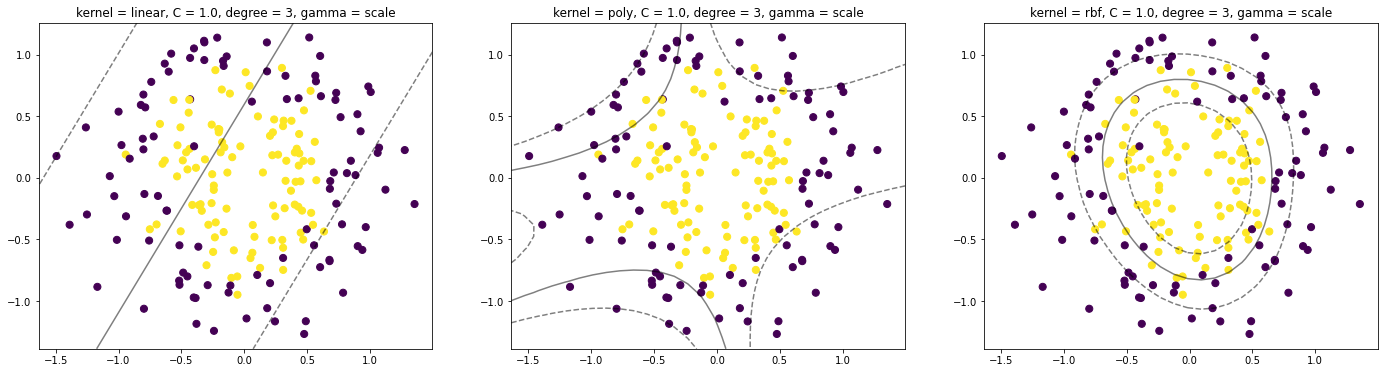

In [126]:
plot_svm(X,
         y,
         kernel_list=['linear', 'poly', 'rbf'])

##### 1-2. Please use the __**svc**__ with ***linear*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***C*** on the given data below. Try ***C=0.001 & 10000*** at least, and you can try more values of ***C*** to prove your observation. (5%)

My Ans: 
> Low C implies we are allowing more outliers and high C implies less outliers. Hence, it's crucial to set a appropriate value of C to prevent overfitting or underfitting. In this dataset there's no apparent differnce in the 4 "final hyperplanes" (except for the margin). In my opinion, we'd be better to choose 0.1 to 10 of C in this case to prevent our model from being so sensitive to outlier or being inaccurate of classification.

In [127]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

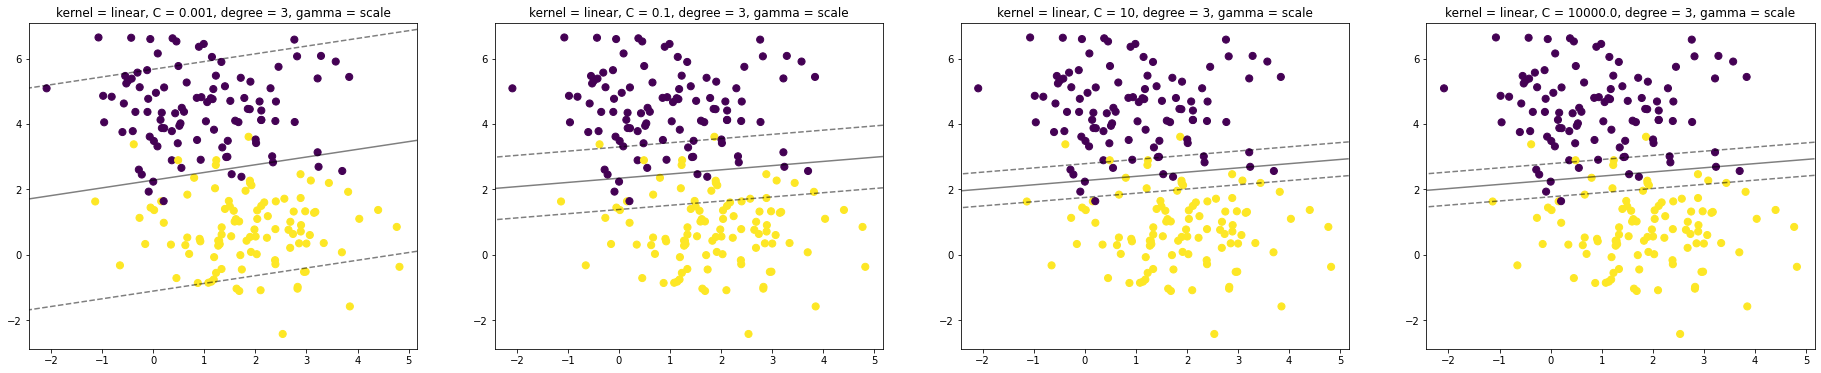

In [128]:
plot_svm(X,
         y,
         kernel_list=['linear'],
         C_list=[1e-3, 1e-1, 10, 1e+4])

##### 1-3. Please use the __**svc**__ with ***poly*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***degree*** on the given data below. Try ***degree=3 & 10*** at least, and you can try more values of ***degree*** to prove your observation.(5%)

My Ans: 
> The higher the degree, the more possibly the model could be over-fitting. In this case, 3 to 6 of the degree seems to be appropriate for the model to prevent overfitting.

In [129]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

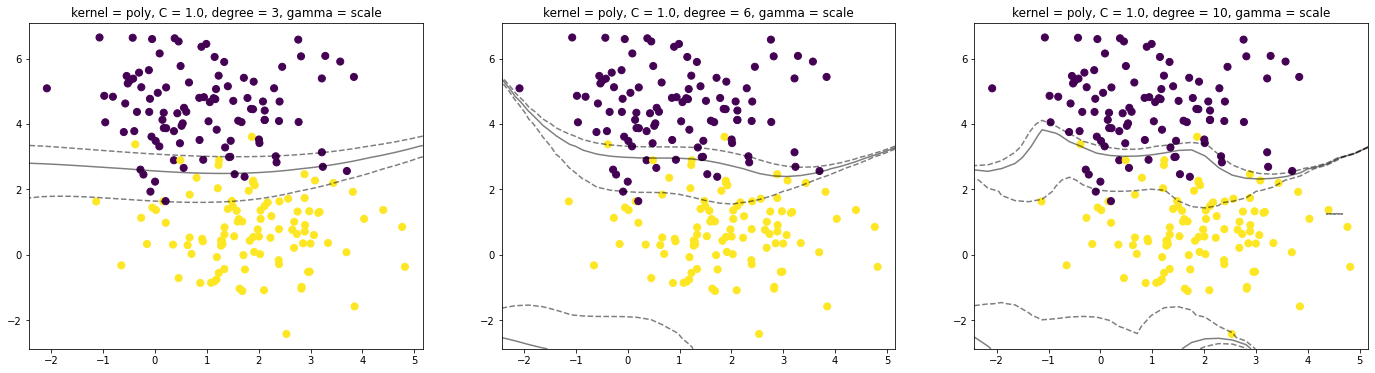

In [130]:
plot_svm(X,
         y,
         kernel_list=['poly'],
         degree_list=[3, 6, 10])

##### 1-4. Please use the __**svc**__ with ***rbf*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***gamma*** on the given data below. Try ***gamma=1 & 10*** at least, and you can try more values of ***gamma*** to prove your observation. (5%)

My Ans: 
> The higher the gamma, the more possibly the model could be over-fitting and complex. In this case, 1 to 5 of the gamma seems to be appropriate for the model to prevent overfitting.

In [131]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=0)

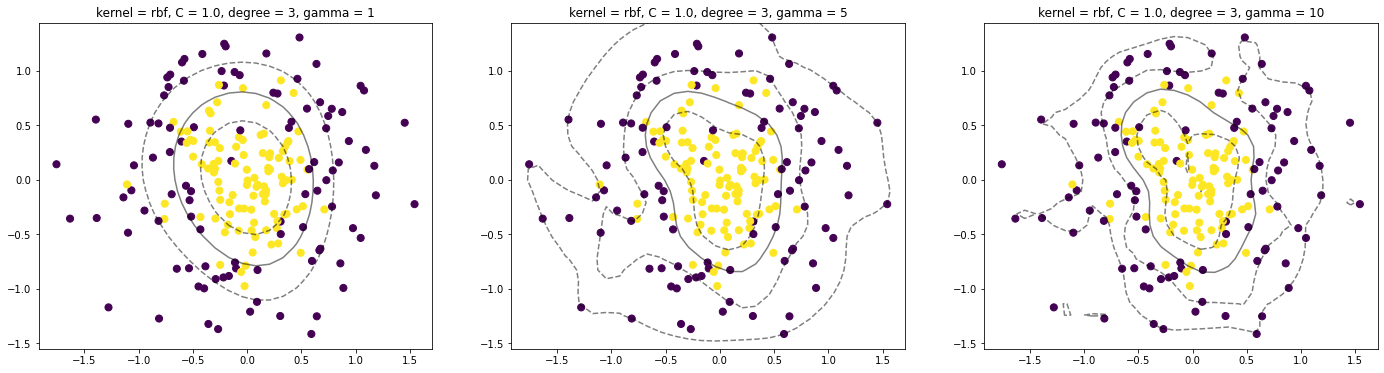

In [132]:
plot_svm(X,
         y,
         gamma_list=[1, 5, 10])

### 2. Model evaluation and hyper parameters searching. (30%)
#### Please make the scatter plots of data, visualize the decision boundary and positive and negative hyperplanes and calculate the accuracy score on training data and testing data on the following questions.

##### Here is the example of the figure:
![2.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/2.png?raw=true)

##### 2-1 Use the ***training ratio 0.8 and 0.2*** to split the given data, and use the ***rbf*** kernel with ***gamma = "auto"***. Please discuss the impact of training ratio. (Split the data with random state 0) (10%)

My Ans: 
> If the training ratio is high enough, our model normaly performs better on the test dataset (acc=0.875). Otherwise, our model would get less information to train and could be underfitting when testing other data (acc=0.806) despite the higher acc score on training data (acc=0.95).

In [250]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

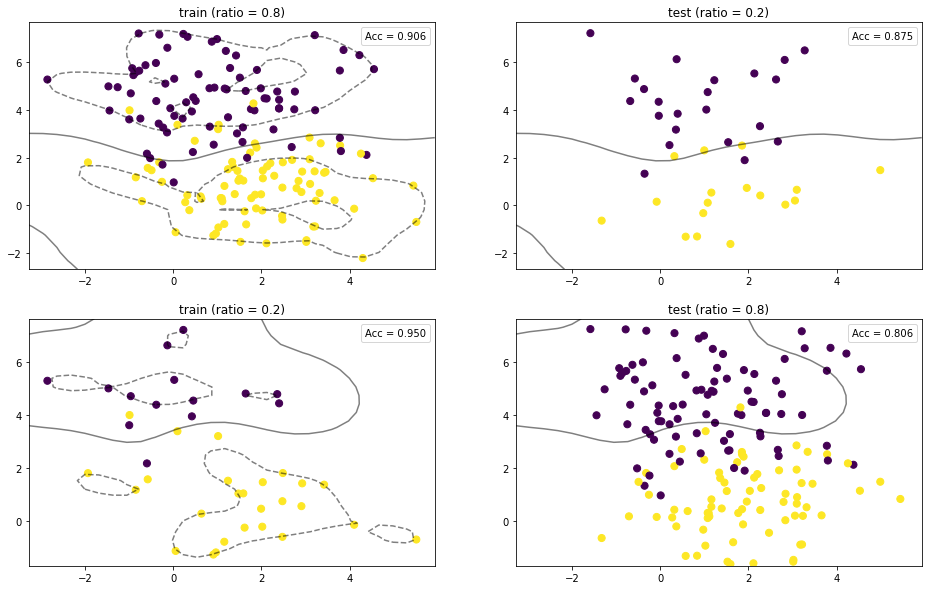

In [251]:
def plot_train_test(train_ratio_list, kernel='rbf', gamma='scale'):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    for row, train_ratio in enumerate(train_ratio_list):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=0)
        model = SVC(kernel=kernel, gamma=gamma)
        model.fit(X_train, y_train)

        for col, mode in enumerate(["train", "test"]):
            ax = axes[row][col]

            if mode == 'train':
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50,
                           label=f"Acc = {model.score(X_train, y_train):.3f}")
                ax.set_title(f"{mode} (ratio = {train_ratio})")
                # Remove the legend marekr and the blank space
                ax.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
                # get the axes limits of the training data
                xlim = ax.get_xlim()
                ylim = ax.get_ylim()
                plot_svc_decision_function(model, ax, mode)
            else:
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50,
                           label=f"Acc = {model.score(X_test, y_test):.3f}")
                ax.set_title(f"{mode} (ratio = {1 - train_ratio:.1f})")
                # fix the axes limits of the test data
                ax.set_xlim(xlim)
                ax.set_ylim(ylim)
                ax.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
                plot_svc_decision_function(model, ax, mode)


plot_train_test(train_ratio_list=[0.8, 0.2], kernel='rbf', gamma='auto')


##### 2-2 Split the given data with ***training ratio 0.8***, and use the ***rbf*** kernel with different values of ***gamma = 1 and 10***. Please discuss the impact of gamma. (Split the data with random state 0) (10%)

My Ans: 
> The model with lower gamma value performs better than the higher one in the test data. We can tell that the model (gamma=10) seems to be overfitting and strongly focus on the accuracy of the training data, which leads to high complexity and makes it performs worse when predicting test data.

In [138]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

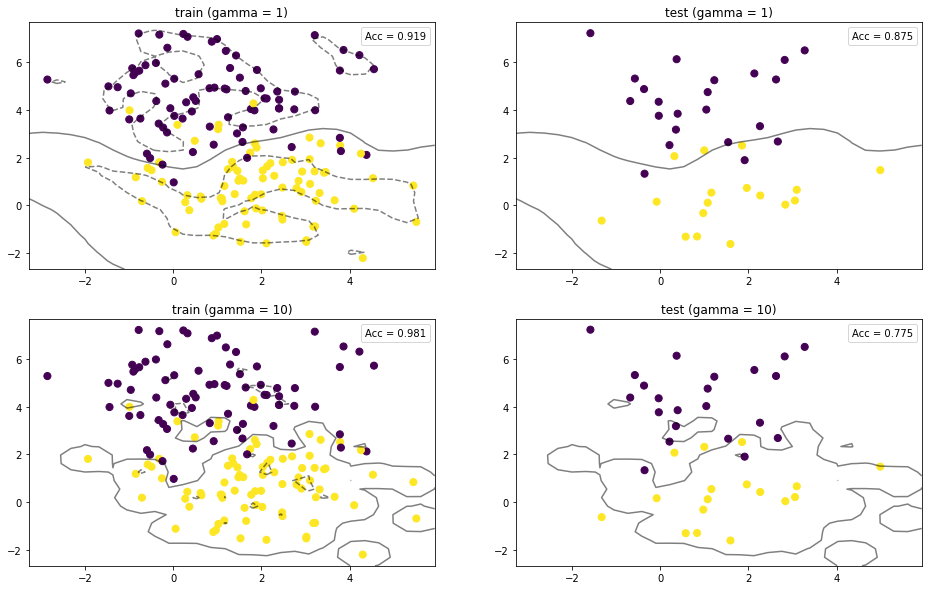

In [148]:
def plot_train_test(train_ratio, kernel='rbf', gamma_list=[]):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    for row, gamma in enumerate(gamma_list):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=0)
        model = SVC(kernel=kernel, gamma=gamma)
        model.fit(X_train, y_train)

        for col, mode in enumerate(["train", "test"]):
            ax = axes[row][col]

            if mode == 'train':
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50,
                           label=f"Acc = {model.score(X_train, y_train):.3f}")
                ax.set_title(f"{mode} (gamma = {gamma})")
                # Remove the legend marekr and the blank space
                ax.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
                # get the axes limits of the training data
                xlim = ax.get_xlim()
                ylim = ax.get_ylim()
                plot_svc_decision_function(model, ax, mode)
            else:
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50,
                           label=f"Acc = {model.score(X_test, y_test):.3f}")
                ax.set_title(f"{mode} (gamma = {gamma})")
                # fix the axes limits of the test data
                ax.set_xlim(xlim)
                ax.set_ylim(ylim)
                ax.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
                plot_svc_decision_function(model, ax, mode)


plot_train_test(train_ratio=0.8, kernel='rbf', gamma_list=[1, 10])


##### 2-3 Tune the parameter by the given data with ***GridSearchCV*** function and do the 2 fold cross validation. Please try the parameters below to find the best parameter and plot the result and show the accuracy score. 
##### (You can find the details of ***GridSearchCV*** function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV) (10%)
| | 01 | 02 | 03 | 04 |
|:---:|:---:|:---:|:---:|:---:|
|***Kernel***| Linear | rbf | -| -|
|***C***| 0.1 | 1 | 10|100|
|***gamma***| 1 | 0.1 | 0.01|0.001|

In [161]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

In [168]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ('linear', 'rbf'), 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
clf = GridSearchCV(SVC(), param_grid, cv=2, n_jobs=-1, verbose=3)
clf.fit(X, y)
# print(clf.best_estimator_.get_params())
print(f"best params: {clf.best_params_}")

Fitting 2 folds for each of 32 candidates, totalling 64 fits
best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


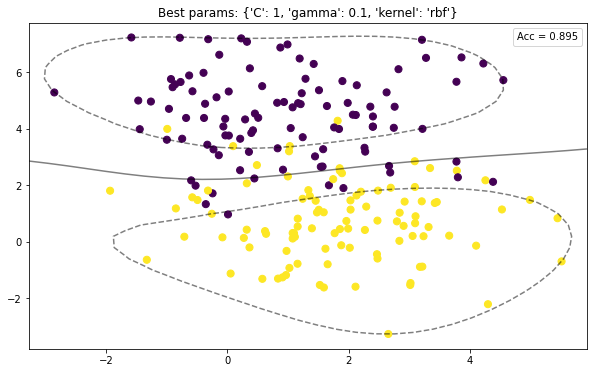

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, label=f"Acc = {clf.best_estimator_.score(X, y):.3f}")
ax.set_title(f'Best params: {clf.best_params_}')
ax.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(clf.best_estimator_, ax)

### 3. Fitting the SVM with the real data. (40%)
#### This question will fit the SVM with real raw data. Try the technique above to reach the highest score.

##### 3-1 Data preprocesssing : Please draw the boxplots of each features and draw another figure with boxplots of each feaures after applying the min max scaling . (10%)

##### Here is the example of figure:
![3.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/3.png?raw=true)

In [254]:
# Do not change the data
data = load_breast_cancer()
X, y, features = data.data, data.target, data.feature_names
print(f"feature num: {len(features)}")

feature num: 30


Text(0.5, 0.98, 'Boxplots of each feature')

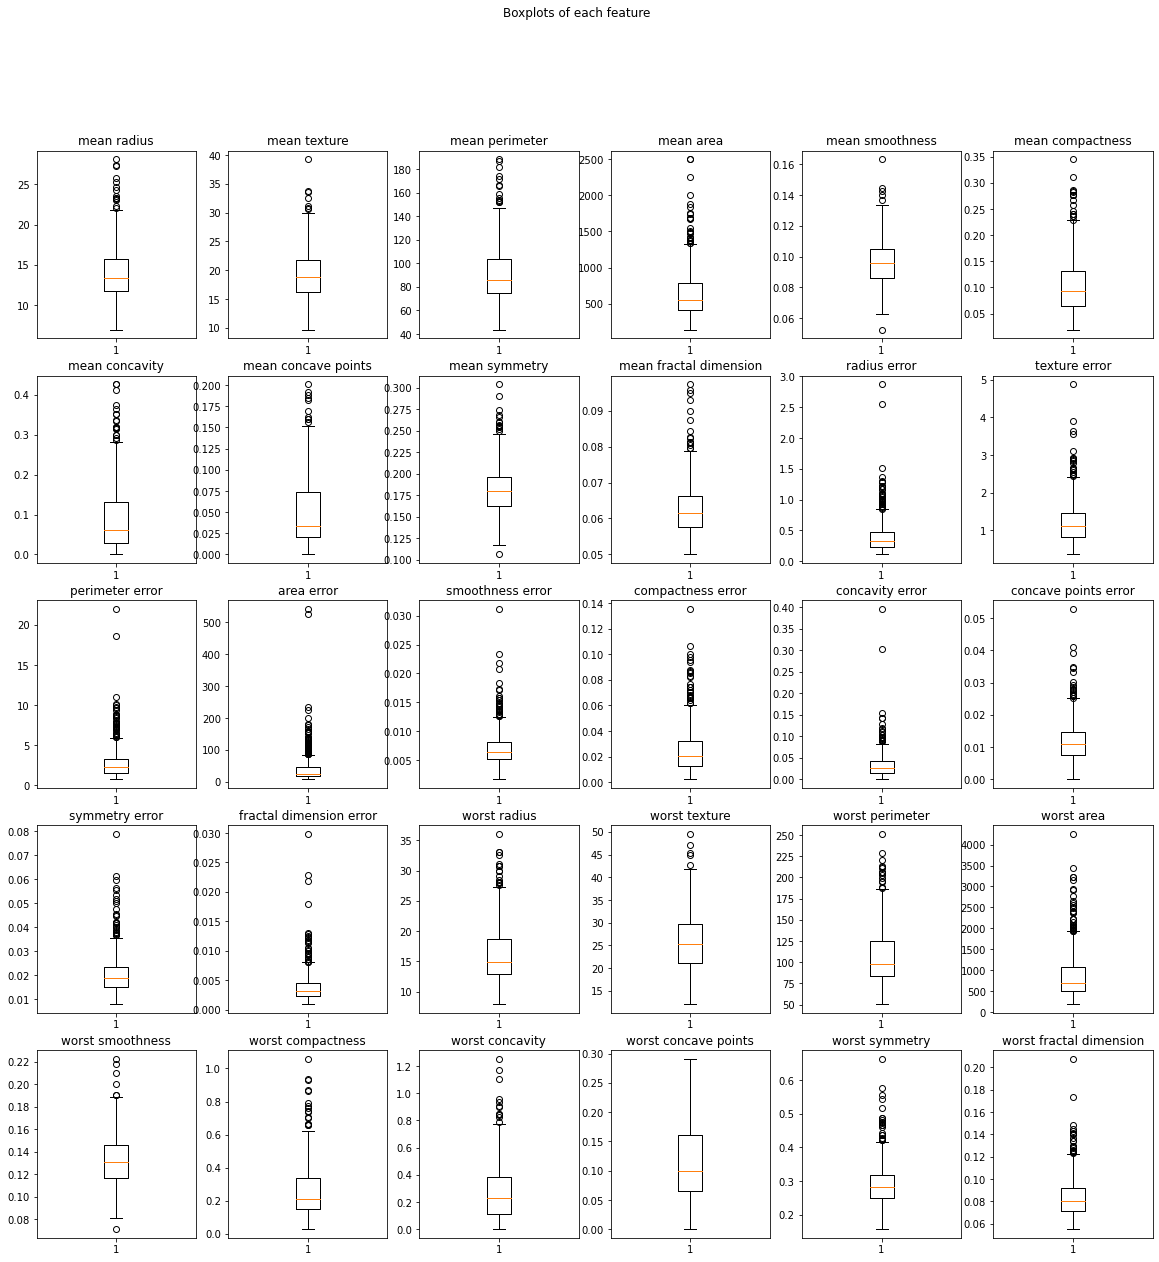

In [255]:
# draw the boxplots of each features
fig, axes = plt.subplots(5, 6, figsize = (20, 20))
for num in range(len(features)):
    ax = axes[num // 6][num % 6]
    ax.boxplot(X[:, num])
    ax.set_title(features[num])
fig.suptitle("Boxplots of each feature")

Text(0.5, 0.98, 'Boxplots of each feature after min-max scaling')

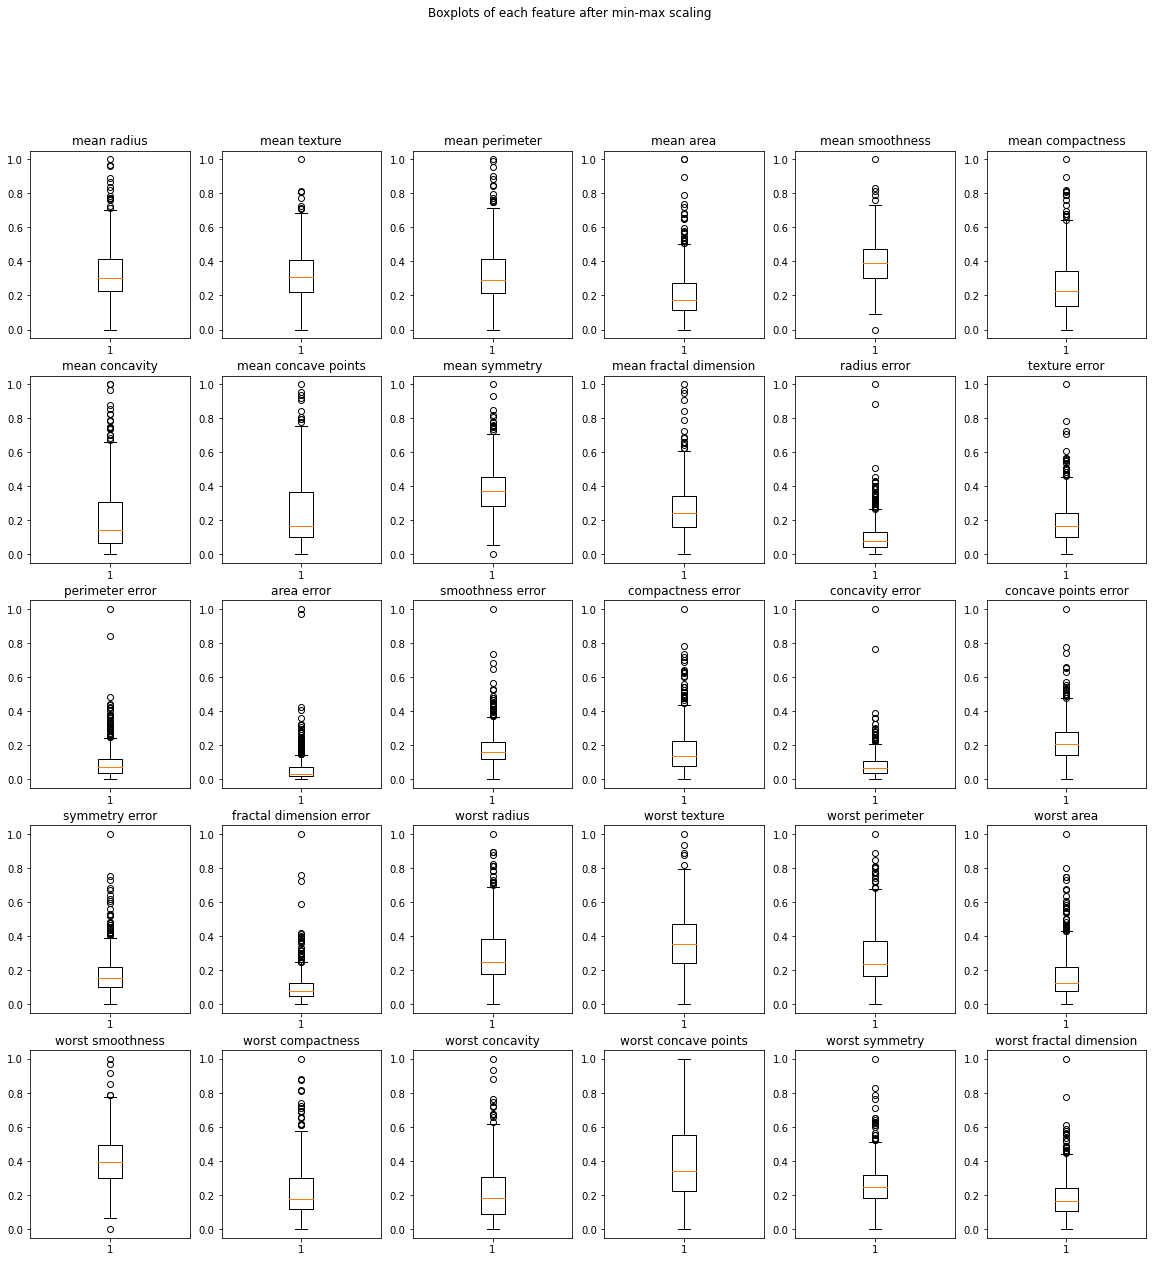

In [256]:
from sklearn.preprocessing import MinMaxScaler
X_scale = MinMaxScaler().fit_transform(X)

# draw the boxplots of each features
fig, axes = plt.subplots(5, 6, figsize = (20, 20))
for num in range(len(features)):
    ax = axes[num // 6][num % 6]
    ax.boxplot(X_scale[:, num])
    ax.set_title(features[num])
fig.suptitle("Boxplots of each feature after min-max scaling")

##### 3-2  Please split the data with training ratio 0.8, and fit the SVM with your own hyper parameters (at least two sets of parameters). Also, draw the ROC curve and calculate the AUC score of the testing data to compare the performance of two models. (Note. The tutorial considers only one decision threshold, you should think about how to draw the ROC curve with defferent decision threshold) (20%)

My Ans: 
> The AUC scores of the two model are higher than 0.5, which means that these classifiers performs better than randomly guessing.
The poly model has higher score of AUC than the RBF model. We believe the poly model performs better than the RBF one overally.

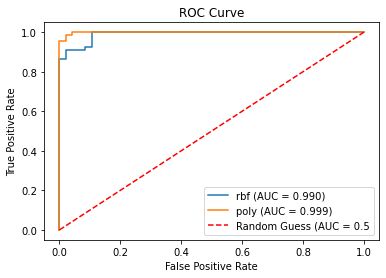

In [260]:
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, train_size=0.8, random_state=0)

model_dict = {'rbf': SVC(kernel='rbf', C=0.1, gamma=1, probability=True), 
              'poly': SVC(kernel='poly', degree=3, probability=True)}

for mode, model in model_dict.items():
    model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{mode} (AUC = {roc_auc:.3f})")
    
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess (AUC = 0.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### 3-3 Compare the models from question 3-2 and choose the best parameter and corresponding model to draw the cofusion matrix of training data and testing data, and calculate the accuracy, precision, recall and F1-score. (10%)

My Ans: 
> The AUC scores of the two model are higher than 0.5, which means that these classifiers performs better than randomly guessing.
The poly model has higher score of AUC than the RBF model. We believe the poly model performs better than the RBF one overally.

Training data metrics
Accuracy: 0.987
Precision: 0.970
Recall: 0.994
F1-score: 0.982


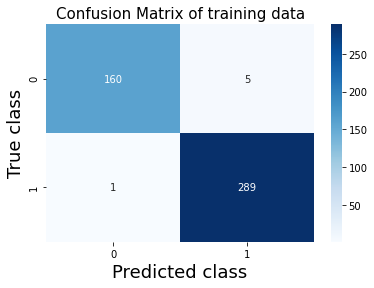

Training data metrics
Accuracy: 0.982
Precision: 0.979
Recall: 0.979
F1-score: 0.979


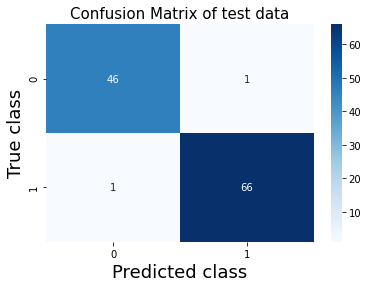

In [258]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# return accuracy, precision, recall, f1-score  
def calculate_metrics(cf_mat) -> tuple:  
    TP, FP, FN, TN = cf_mat.ravel()
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * precision * recall / (precision + recall)
    return accuracy, precision, recall, f1_score

model = model_dict['poly']

################# CF matrix for traing data#####################
y_pred = model.predict(X_train)
cf_mat = confusion_matrix(y_train, y_pred)
accuracy, precision, recall, f1_score = calculate_metrics(cf_mat)
print(f"Training data metrics\n\
Accuracy: {accuracy:.3f}\n\
Precision: {precision:.3f}\n\
Recall: {recall:.3f}\n\
F1-score: {f1_score:.3f}")

ax = sns.heatmap(cf_mat, annot=True, fmt="d", cmap="Blues")
ax.set_title(f"Confusion Matrix of training data", fontsize = 15)
ax.set_xlabel('Predicted class', fontsize = 18)
ax.set_ylabel('True class', fontsize = 18)
plt.show()

################## CF matrix for test data ####################
y_pred = model.predict(X_test)
cf_mat = confusion_matrix(y_test, y_pred)
accuracy, precision, recall, f1_score = calculate_metrics(cf_mat)
print(f"Training data metrics\n\
Accuracy: {accuracy:.3f}\n\
Precision: {precision:.3f}\n\
Recall: {recall:.3f}\n\
F1-score: {f1_score:.3f}")

ax = sns.heatmap(cf_mat, annot=True, fmt="d", cmap="Blues")
ax.set_title(f"Confusion Matrix of test data", fontsize = 15)
ax.set_xlabel('Predicted class', fontsize = 18)
ax.set_ylabel('True class', fontsize = 18)
plt.show()       